In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import lightgbm as lgb
df=pd.read_csv(r"E:\Exelr\DataScience-2-6pm\DATASETS\SVMtrain.csv")
df
# 0= person has not survived after accident
#1= person has survived after accident
# p class - general class-1 economic class =2 business class-3
# EMBARKED, BANGLORE-1, CHENNAI-2 , DEHLI-3
# use case: we are trying to analyzing how many travelling from different
# place using LGBM classification

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...,...
884,887,0,2,Male,27.0,0,0,13.0000,3
885,888,1,1,female,19.0,0,0,30.0000,3
886,889,0,3,female,60.0,1,2,23.4500,3
887,890,1,1,Male,26.0,0,0,30.0000,1


In [3]:
df.shape

(889, 9)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [15]:
!pip install lightgbm # pip is package index to install package

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 991.0 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 2.5 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.4 MB 2.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.4 MB 2.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.4 MB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.4 MB 2.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.4 MB 2.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.4 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00


In [19]:
#step3:
x = df.drop(['Embarked','PassengerId'],axis=1)

In [21]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,Male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,Male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
884,0,2,Male,27.0,0,0,13.0000
885,1,1,female,19.0,0,0,30.0000
886,0,3,female,60.0,1,2,23.4500
887,1,1,Male,26.0,0,0,30.0000


In [23]:
y = df.Embarked

In [45]:
x = df.drop(['Sex'],axis=1)

In [47]:
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,22.0,1,0,7.2500,3
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,3
3,4,1,1,35.0,1,0,53.1000,3
4,5,0,3,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
884,887,0,2,27.0,0,0,13.0000,3
885,888,1,1,19.0,0,0,30.0000,3
886,889,0,3,60.0,1,2,23.4500,3
887,890,1,1,26.0,0,0,30.0000,1


In [49]:
# step
# train and test split
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((595, 8), (294, 8), (595,), (294,))

In [51]:
#step:5
from lightgbm import LGBMClassifier
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=5,random_state=42)
model.fit(x_train,y_train)
# learning rate: control epochs
# 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 595, number of used features: 8
[LightGBM] [Info] Start training from score -1.688081
[LightGBM] [Info] Start training from score -2.418269
[LightGBM] [Info] Start training from score -0.320136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)

In [53]:
#step5: 
# read the train and test dataset
train_data = x_train,y_train
test_data = x_test,y_test
#test_data = pd.read_csv('test-data.csv')
train_data
test_data


(     PassengerId  Survived  Pclass   Age  SibSp  Parch      Fare  Embarked
 280          282         0       3  28.0      0      0    7.8542         3
 434          436         1       1  14.0      1      2  120.0000         3
 39            40         1       3  14.0      1      0   11.2417         1
 417          419         0       2  30.0      0      0   13.0000         3
 584          586         1       1  18.0      0      2   79.6500         3
 ..           ...       ...     ...   ...    ...    ...       ...       ...
 710          712         0       1  60.0      0      0   26.5500         3
 838          841         0       3  20.0      0      0    7.9250         3
 380          382         1       3   1.0      0      2   15.7417         1
 140          142         1       3  22.0      0      0    7.7500         3
 173          175         0       1  56.0      0      0   30.6958         1
 
 [294 rows x 8 columns],
 280    3
 434    3
 39     1
 417    3
 584    3
       ..
 

In [55]:
#step:
print('Training accuracy{:.4f} '.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))


Training accuracy1.0000 
Testing accuracy 1.0000


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

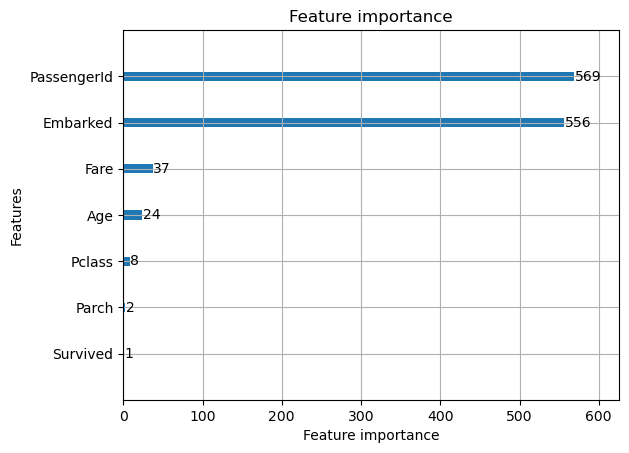

In [57]:
#step:
lgb.plot_importance(model)
# lgb plot: it is data visulization technique used in lgbm method to understand the exact analysis
# it is generally in decresing order